# Lab 3: Entropie warunkowe języków naturalnych

## 1 Rozpoznawanie czy dany tekst to język

In [5]:
from scipy.stats import entropy
from collections import Counter
import matplotlib.pyplot as plt
from tabulate import tabulate


def load_file(fname):
    with open(fname) as f:
        return f.read()
    

def get_ngrams(text, ngram_len):
    return [tuple(text[i:i+ngram_len]) for i in range(len(text) - ngram_len)]
 

def calc_entropy(tokens, ngram_len):
    ngrams = get_ngrams(tokens, ngram_len)
    ngram_cnt = Counter(ngrams)
    ngram_probs = [count / len(ngrams) for count in ngram_cnt.values()]
    return entropy(ngram_probs, base=2)


def calc_cond_entropy(entropies):
    return [e - prev_e for e, prev_e in zip(entropies, [0] + entropies[:-1])]
    

def lang_entropy(filename, entropy_orders):
    ngram_lens = [e + 1 for e in entropy_orders]
    text = load_file(filename)
    
    words = text.split()
    letters = list(text)
    
    # Obliczamy entropie na kolejnych dlugości ngramów
    word_entropies = [calc_entropy(words, ngram_len) for ngram_len in ngram_lens]
    letter_entropies = [calc_entropy(letters, ngram_len) for ngram_len in ngram_lens]
    
    # Obliczamy entropie warunkową korzystając ze wzoru:
    # H(Y|X) = H(Y,X) - H(X)
    word_cond_entropy = calc_cond_entropy(word_entropies)
    letter_cond_entropy = calc_cond_entropy(letter_entropies)
    
    # Prezentacja rozwiazania
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
    fig.suptitle(filename.split("/")[-1])
    
    ax0.plot(entropy_orders, word_cond_entropy, 'o-')
    ax0.set_title("Words")
    ax0.set_xlabel("Conditional Entropy Order")
    ax0.set_ylabel("Conditional Entropy")
    
    ax1.plot(entropy_orders, letter_cond_entropy, 'o-')
    ax1.set_title("Letters")
    ax1.set_xlabel("Conditional Entropy Order")
    ax1.set_ylabel("Conditional Entropy")
    
    plt.show()
    
    print(tabulate([['Words', *word_cond_entropy], ['Letters', *letter_cond_entropy]], headers=["Type", *entropy_orders]))

Sprawdzam entropie warunkową kolejnych rzędów dla jezyków z korpusu.

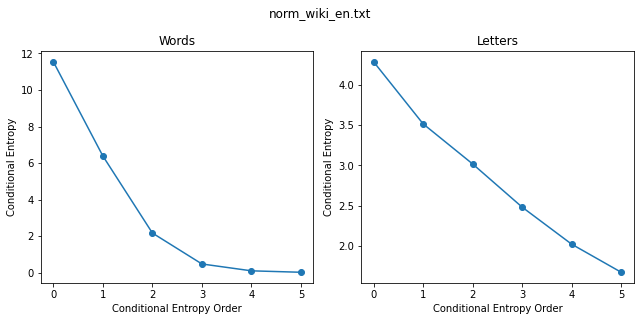

Type            0        1        2         3         4          5
-------  --------  -------  -------  --------  --------  ---------
Words    11.544    6.38917  2.17646  0.484678  0.109652  0.0307703
Letters   4.28822  3.5166   3.01832  2.48157   2.02118   1.67241


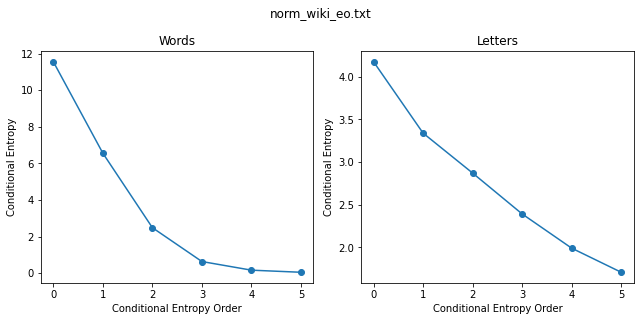

Type            0        1        2         3         4          5
-------  --------  -------  -------  --------  --------  ---------
Words    11.5605   6.55768  2.48472  0.633618  0.161658  0.0469055
Letters   4.17679  3.34001  2.87183  2.39262   1.99151   1.70902


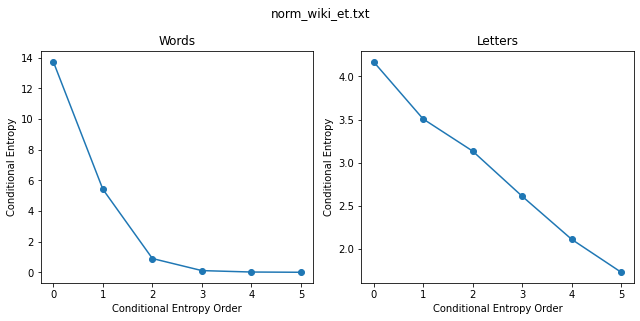

Type            0        1         2         3          4           5
-------  --------  -------  --------  --------  ---------  ----------
Words    13.7462   5.42419  0.904739  0.116196  0.0236461  0.00750881
Letters   4.16983  3.50696  3.13441   2.61087   2.11144    1.72972


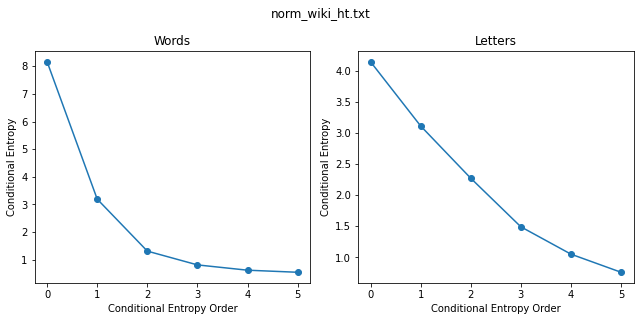

Type           0        1        2         3         4         5
-------  -------  -------  -------  --------  --------  --------
Words    8.16692  3.19312  1.31133  0.812232  0.620578  0.545413
Letters  4.14639  3.11386  2.27353  1.49215   1.05214   0.760936


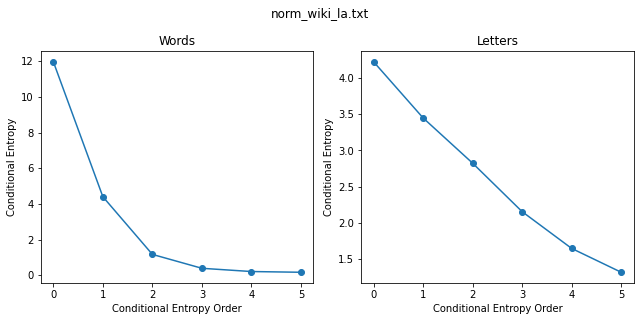

Type            0        1        2         3         4         5
-------  --------  -------  -------  --------  --------  --------
Words    11.9692   4.40003  1.16689  0.388039  0.206473  0.165112
Letters   4.22825  3.45013  2.82349  2.15203   1.64276   1.31275


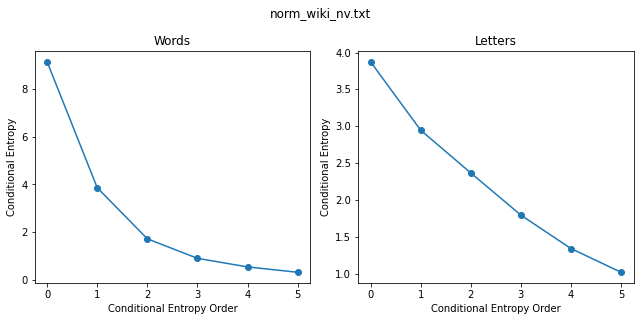

Type           0        1        2         3         4         5
-------  -------  -------  -------  --------  --------  --------
Words    9.15401  3.86393  1.71881  0.899245  0.538567  0.313845
Letters  3.87494  2.94727  2.36758  1.79526   1.3416    1.01985


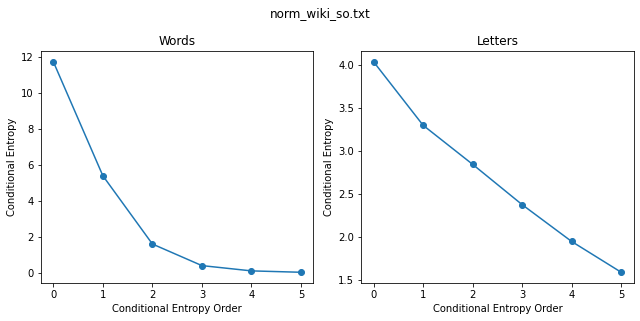

Type            0        1        2         3         4          5
-------  --------  -------  -------  --------  --------  ---------
Words    11.7311   5.39873  1.60862  0.409604  0.116609  0.0395044
Letters   4.04011  3.29957  2.84437  2.37431   1.94503   1.58627


In [6]:
languages = ["en", "eo", "et", "ht", "la", "nv", "so"]


for lang in languages:
    lang_entropy(f"corpus/norm_wiki_{lang}.txt", list(range(0,6)))
    

Teraz sprawdzam czy próbki są językami.

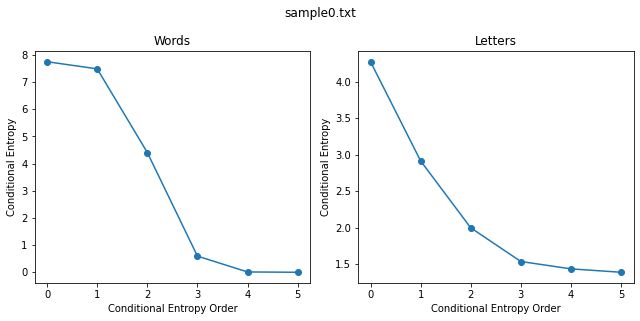

Type           0        1        2         3         4            5
-------  -------  -------  -------  --------  --------  -----------
Words    7.74874  7.48639  4.4067   0.595008  0.012061  9.99564e-05
Letters  4.273    2.91589  2.00036  1.53928   1.43858   1.39197


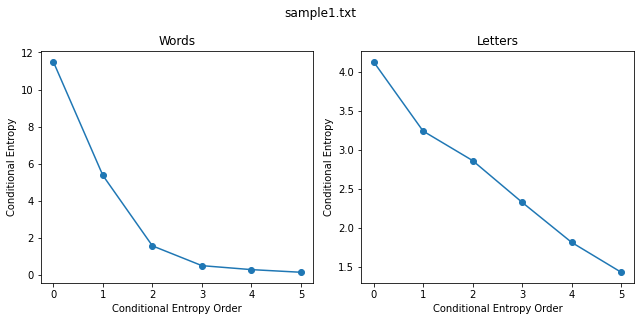

Type            0        1        2         3         4         5
-------  --------  -------  -------  --------  --------  --------
Words    11.5007   5.37224  1.57474  0.507509  0.293456  0.150563
Letters   4.12701  3.23915  2.86128  2.32668   1.81351   1.43112


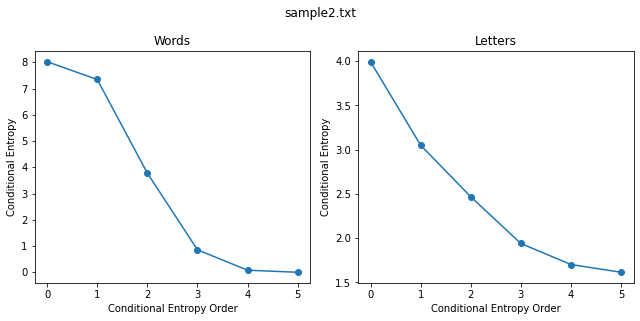

Type           0        1        2         3          4           5
-------  -------  -------  -------  --------  ---------  ----------
Words    8.02387  7.34862  3.78193  0.859505  0.0819899  0.00298573
Letters  3.99331  3.05044  2.46766  1.93977   1.70203    1.61441


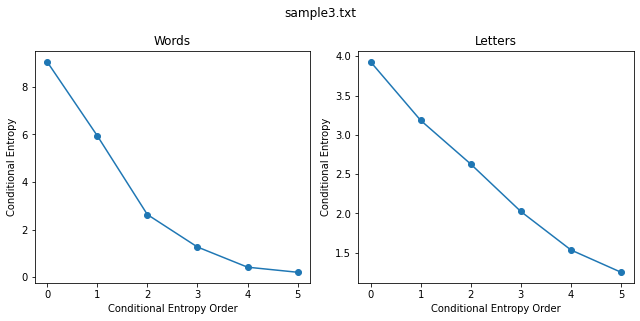

Type           0        1       2        3         4         5
-------  -------  -------  ------  -------  --------  --------
Words    9.06111  5.95022  2.6308  1.26409  0.414325  0.200121
Letters  3.9303   3.18447  2.6279  2.02399  1.53424   1.25041


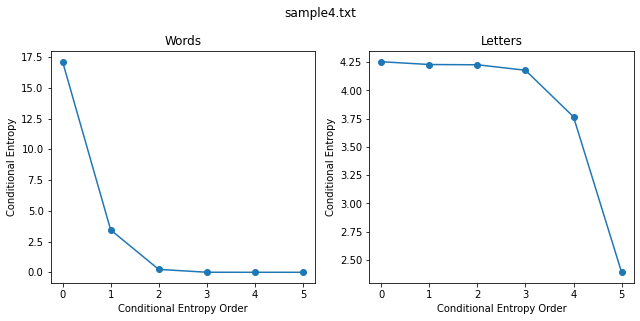

Type            0        1         2           3           4             5
-------  --------  -------  --------  ----------  ----------  ------------
Words    17.1297   3.44425  0.234075  0.00322664  6.8248e-06  -7.84094e-07
Letters   4.25381  4.2291   4.22683   4.17854     3.76613      2.39057


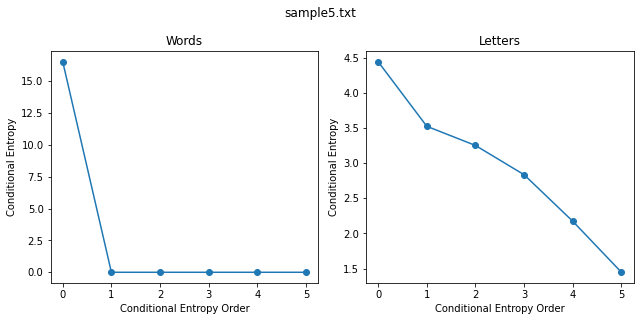

Type            0             1             2             3             4             5
-------  --------  ------------  ------------  ------------  ------------  ------------
Words    16.5095   -3.08511e-08  -3.08506e-08  -3.08499e-08  -3.08493e-08  -3.08487e-08
Letters   4.44169   3.5231        3.25062       2.83427       2.17244       1.44687


In [8]:
for i in range(6):
    lang_entropy(f"corpus/sample{i}.txt", list(range(0,6)))

- sample0 - NIE - Występuje bardzo mała różnica między entropia warunkowa rzędu 0 a 1 dla wyrazów.
- sample1 - TAK - Entropia warunkowa maleje znacząco z każdym rzędem. Kształ krzywych podobny do krzywych języków nautralnych.
- sample2 - NIE - Analogicznie do sample0.
- sample3 - TAK - Entropia warunkowa maleje znacząco z każdym rzędem. Kształ krzywych podobny do krzywych języków nautralnych.
- sample4 - NIE - Jeżeli spojrzymy na języki naturalne, wykres dla liter ma w przybliżeniu kształ lini prostej. W tym przypadku miedzy 0 a 4 rzędem entropia warunkowa jest prawie taka sama i maleje dopiero przy 5 rzędzie.
- sample5 - NIE - Entropia warunkowa dla wyrazów bardzo mocno maleje przy 1 rzędzie po czym jest prawie stała.